In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

In [65]:
start = '2014-01-01'
end = '2024-12-21'
stock = 'GOOG'

data = yf.download(stock, start, end)

[*********************100%***********************]  1 of 1 completed


In [66]:
data

Price,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG
Date,,,,,
2014-01-02,27.593388,27.708162,27.472912,27.651396,73129082
2014-01-03,27.392099,27.687835,27.390364,27.639993,66917888
2014-01-06,27.697504,27.735678,27.427797,27.590663,71037271
2014-01-07,28.231462,28.252039,27.792695,27.887885,102486711
2014-01-08,28.290215,28.441181,28.093387,28.408459,90036218
...,...,...,...,...,...
2024-12-16,197.934509,200.411683,193.889115,194.143830,32248600
2024-12-17,196.895676,202.649131,196.466172,198.304075,24129500


In [67]:
ma_100_days = data.Close.rolling(window=100).mean()

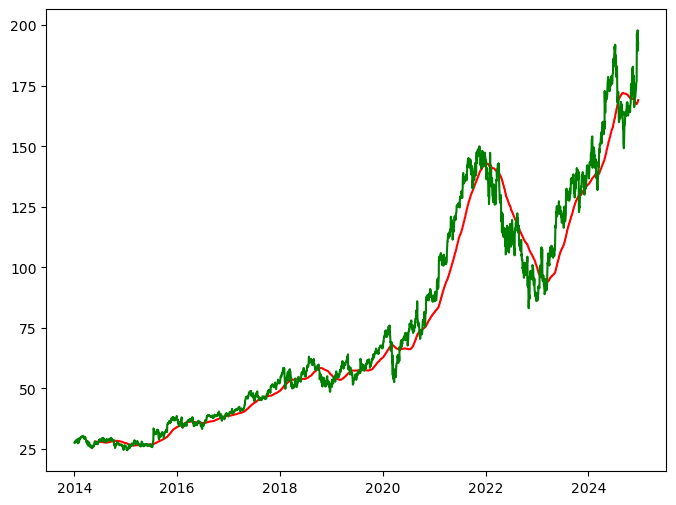

In [68]:
plt.figure(figsize=(8, 6))
plt.plot(ma_100_days, 'r')
plt.plot(data.Close, 'g')
plt.show()

In [69]:
ma_200_days = data.Close.rolling(window=200).mean()

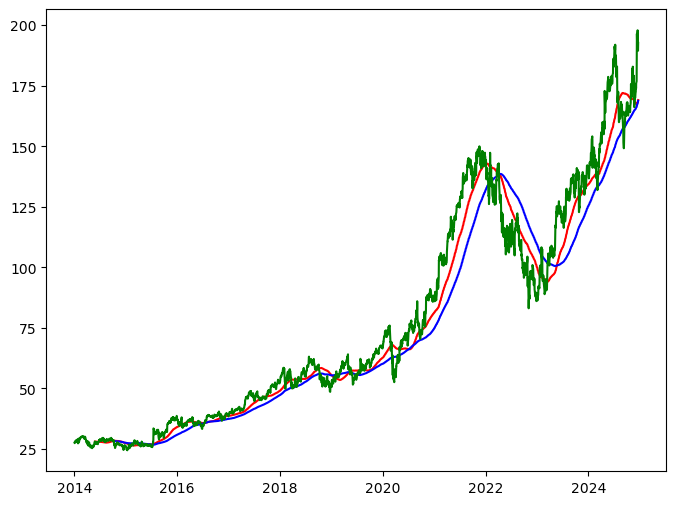

In [70]:
plt.figure(figsize=(8, 6))
plt.plot(ma_100_days, 'r')
plt.plot(ma_200_days, 'b')
plt.plot(data.Close, 'g')
plt.show()

In [71]:
# Convert the data into a pandas DataFrame
df = pd.DataFrame(data)
df

Price,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG
Date,,,,,
2014-01-02,27.593388,27.708162,27.472912,27.651396,73129082
2014-01-03,27.392099,27.687835,27.390364,27.639993,66917888
2014-01-06,27.697504,27.735678,27.427797,27.590663,71037271
2014-01-07,28.231462,28.252039,27.792695,27.887885,102486711
2014-01-08,28.290215,28.441181,28.093387,28.408459,90036218
...,...,...,...,...,...
2024-12-16,197.934509,200.411683,193.889115,194.143830,32248600
2024-12-17,196.895676,202.649131,196.466172,198.304075,24129500


In [72]:
print(df.columns)

MultiIndex([( 'Close', 'GOOG'),
            (  'High', 'GOOG'),
            (   'Low', 'GOOG'),
            (  'Open', 'GOOG'),
            ('Volume', 'GOOG')],
           names=['Price', 'Ticker'])


In [73]:
df.columns = ['Close', 'High', 'Low', 'Open', 'Volume']
df.head()

,Close,High,Low,Open,Volume
Date,,,,,
2014-01-02,27.593388,27.708162,27.472912,27.651396,73129082
2014-01-03,27.392099,27.687835,27.390364,27.639993,66917888
2014-01-06,27.697504,27.735678,27.427797,27.590663,71037271
2014-01-07,28.231462,28.252039,27.792695,27.887885,102486711
2014-01-08,28.290215,28.441181,28.093387,28.408459,90036218


In [74]:
df.dropna(inplace=True)

In [75]:
df_train = pd.DataFrame(df.Close[:int(len(df)* 0.80)])
df_test = pd.DataFrame(df.Close[int(len(df)* 0.80): len(df)])

In [76]:
df_train.shape[0]

2209

In [77]:
df_test.shape[0]

553

In [78]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range= (0, 1))

In [79]:
df_train_scale = scaler.fit_transform(df_train)

In [80]:
x = []
y = []

for i in range(100, df_train_scale.shape[0]):
    x.append(df_train_scale[i-100:i])
    y.append(df_train_scale[i,0])

In [81]:
x, y = np.array(x), np.array(y)

In [82]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [85]:
model = Sequential()
model.add(LSTM(units=50, activation= 'relu', return_sequences=True, input_shape=((x.shape[1], 1))))

model.add(Dropout(0.2))

model.add(LSTM(units=60, activation= 'relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

In [86]:
model.compile(optimizer= 'adam', loss='mean_squared_error')

In [87]:
model.fit(x, y, epochs=50, batch_size=32, verbose=1)

Epoch 1/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 8s 91ms/step - loss: 0.0709
Epoch 2/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 6s 92ms/step - loss: 0.0073
Epoch 3/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 6s 93ms/step - loss: 0.0069
Epoch 4/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 6s 94ms/step - loss: 0.0055
Epoch 5/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 6s 94ms/step - loss: 0.0055
Epoch 6/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 6s 96ms/step - loss: 0.0052
Epoch 7/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 6s 95ms/step - loss: 0.0057
Epoch 8/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 6s 96ms/step - loss: 0.0041
Epoch 9/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 6s 96ms/step - loss: 0.0049
Epoch 10/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 6s 97ms/step - loss: 0.0047
Epoch 11/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 6s 97ms/step - loss: 0.0036
Epoch 12/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 6s 96ms/step - loss: 0.0042
Epoch 13/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 7s 100ms/step - loss: 0.0045
Epoch 14/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 6s 98ms/step - loss: 0.0042
Epoch 15/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 7s 102ms/step - loss: 0.0039
Ep

In [88]:
model.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_6 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [89]:
pas_100_days = df_train.tail(100)

In [90]:
data_test = pd.concat([pas_100_days, df_test], ignore_index=True)

In [93]:
data_test_scale = scaler.fit_transform(data_test)

In [101]:
x = []
y = []

for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])

x, y = np.array(x), np.array(y)

In [102]:
y_pred = model.predict(x)

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step


In [105]:
scale = 1/scaler.scale_

In [106]:
y_pred = y_pred*scale

In [107]:
y = y*scale

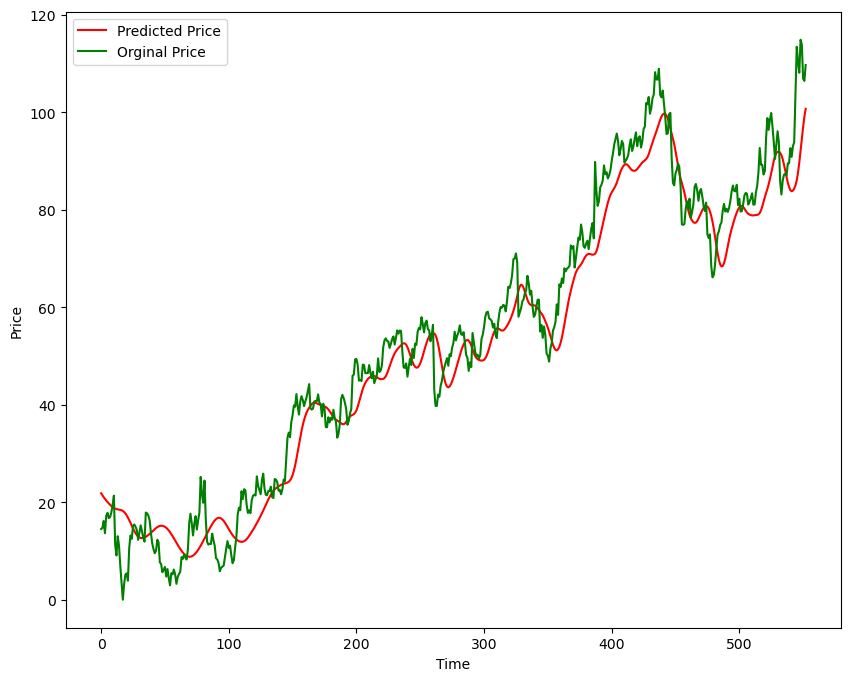

In [108]:
plt.figure(figsize=(10, 8))
plt.plot(y_pred, 'r', label='Predicted Price')
plt.plot(y, 'g', label = 'Orginal Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [109]:
model.save('Stock_prediction_model.keras')